## Dog or Not Dog [shiv]

In [1]:
from imgdata import ImgData
import numpy as np

Total 4000 image files found


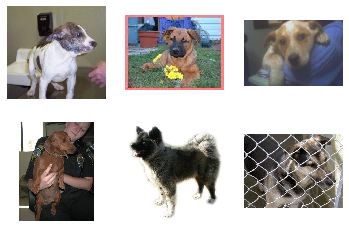

In [2]:
idog= ImgData("data/dog/")
idog.get_all_files()
idog.plot_raw_sample(rows= 2, cols= 3)

In [3]:
dog_data = idog.process(size=(150,150), count= -1, silent= True)

Resizing DONE
Converting to NP DONE


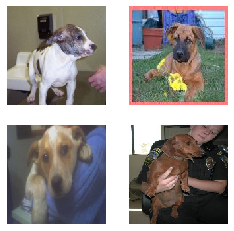

In [4]:
idog.plot_np_imgs(dog_data)

Total 2500 image files found


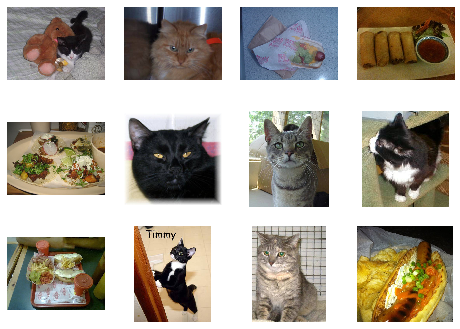

In [5]:
indog= ImgData("data/notdog/")
indog.get_all_files()
indog.plot_raw_sample(rows= 3, cols= 4)

In [6]:
ndog_data = indog.process(size=(150,150), count= -1, silent= True)

Resizing DONE
Converting to NP DONE


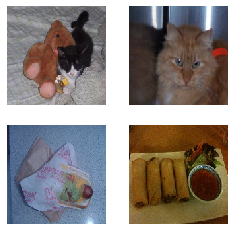

In [7]:
indog.plot_np_imgs(ndog_data)

### Combining

In [8]:
y_dog= np.zeros((dog_data.shape[0], 1))
y_ndog= np.ones((ndog_data.shape[0], 1))
print(y_dog.shape, y_ndog.shape)

(4000, 1) (2500, 1)


In [ ]:
X, y= idog.shuffle([(dog_data, y_dog), (ndog_data, y_ndog)])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 150, 150, 3)
(750, 1)
(250, 150, 150, 3)
(250, 1)


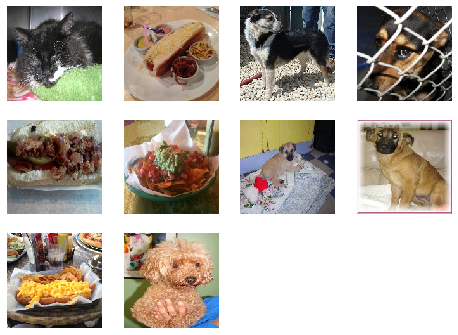

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [73]:
idog.plot_np_imgs(X_train, count=10)
print(y_train[:10])

## Model Building

In [89]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf

In [90]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))


x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [91]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
__________

In [93]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [94]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 750 samples, validate on 250 samples
Epoch 1/5
750/750 [==============================] - 29s 38ms/sample - loss: 8.3333 - acc: 0.4827 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 2/5
750/750 [==============================] - 32s 42ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 3/5
750/750 [==============================] - 31s 41ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 4/5
750/750 [==============================] - 30s 40ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 5/5
750/750 [==============================] - 32s 43ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
